## Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

ModuleNotFoundError: No module named 'yfinance'

## 1. Mengambil Data Historis PEPE (PEPE-USD) - Pastikan data tersedia

In [21]:
data = yf.download('PEPE-USD', start='2021-01-01', end='2024-12-11')

# Menampilkan data
data.head()

[*********************100%***********************]  1 of 1 completed


Price,Adj Close,Close,High,Low,Open,Volume
Ticker,PEPE-USD,PEPE-USD,PEPE-USD,PEPE-USD,PEPE-USD,PEPE-USD
Date,,,,,,
2022-08-15,0.000269,0.000269,0.000441,0.000198,0.000376,620626
2022-08-16,0.000120,0.000120,0.000291,0.000102,0.000269,410426
2022-08-17,0.000065,0.000065,0.000142,0.000065,0.000120,229177
2022-08-18,0.000057,0.000057,0.000091,0.000050,0.000065,176171
2022-08-19,0.000033,0.000033,0.000058,0.000033,0.000057,107870


## 2. Preprocessing Data

In [27]:
data_close = data['Close'].values
data_close = data_close.reshape(-1, 1)

# Normalisasi data
scaler = MinMaxScaler(feature_range=(0, 1))
data_scaled = scaler.fit_transform(data_close)

# Membagi data menjadi data latih dan data uji
train_size = int(len(data_scaled) * 0.8)
train_data, test_data = data_scaled[:train_size], data_scaled[train_size:]

# Fungsi untuk membuat dataset dengan langkah waktu tertentu
def create_dataset(data, time_step=60):
    x, y = [], []
    for i in range(len(data) - time_step - 1):
        x.append(data[i:(i + time_step), 0])
        y.append(data[i + time_step, 0])
    return np.array(x), np.array(y)

# Membuat dataset latih dan uji
time_step = 60
x_train, y_train = create_dataset(train_data, time_step)
x_test, y_test = create_dataset(test_data, time_step)

# Memeriksa ukuran x_train dan x_test sebelum reshaping
print(f"x_train shape: {x_train.shape}")
print(f"x_test shape: {x_test.shape}")

# Jika x_train atau x_test kosong atau tidak sesuai, perbaiki atau berikan pesan error
if x_train.shape[0] == 0 or x_test.shape[0] == 0:
    print("Data latih atau data uji tidak memiliki cukup data untuk reshaping.")
else:
    # Reshaping data untuk input ke LSTM (batch_size, time_steps, features)
    x_train = x_train.reshape(x_train.shape[0], x_train.shape[1], 1)
    x_test = x_test.reshape(x_test.shape[0], x_test.shape[1], 1)

    print(f"Reshaped x_train shape: {x_train.shape}")
    print(f"Reshaped x_test shape: {x_test.shape}")

x_train shape: (34, 60)
x_test shape: (0,)
Data latih atau data uji tidak memiliki cukup data untuk reshaping.


## 3. Membangun Model LSTM

In [28]:
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(LSTM(units=50, return_sequences=False))
model.add(Dense(units=1))

## 4. Kompilasi Model

In [29]:
model.compile(optimizer='adam', loss='mean_squared_error')

## 5. Melatih Model

In [30]:
history = model.fit(x_train, y_train, epochs=10, batch_size=32, validation_data=(x_test, y_test))

Epoch 1/10
2/2 [==============================] - 2s 51ms/step - loss: 1.1255e-04
Epoch 2/10
2/2 [==============================] - 0s 29ms/step - loss: 2.8622e-05
Epoch 3/10
2/2 [==============================] - 0s 32ms/step - loss: 1.5194e-05
Epoch 4/10
2/2 [==============================] - 0s 32ms/step - loss: 1.3703e-05
Epoch 5/10
2/2 [==============================] - 0s 28ms/step - loss: 1.1086e-05
Epoch 6/10
2/2 [==============================] - 0s 28ms/step - loss: 1.5793e-05
Epoch 7/10
2/2 [==============================] - 0s 31ms/step - loss: 1.2700e-05
Epoch 8/10
2/2 [==============================] - 0s 29ms/step - loss: 1.0556e-05
Epoch 9/10
2/2 [==============================] - 0s 29ms/step - loss: 1.1076e-05
Epoch 10/10
2/2 [==============================] - 0s 30ms/step - loss: 1.0425e-05


## 6. Prediksi Harga PEPE ke Depan (30 Hari)

1/1 [==============================] - 0s 17ms/step


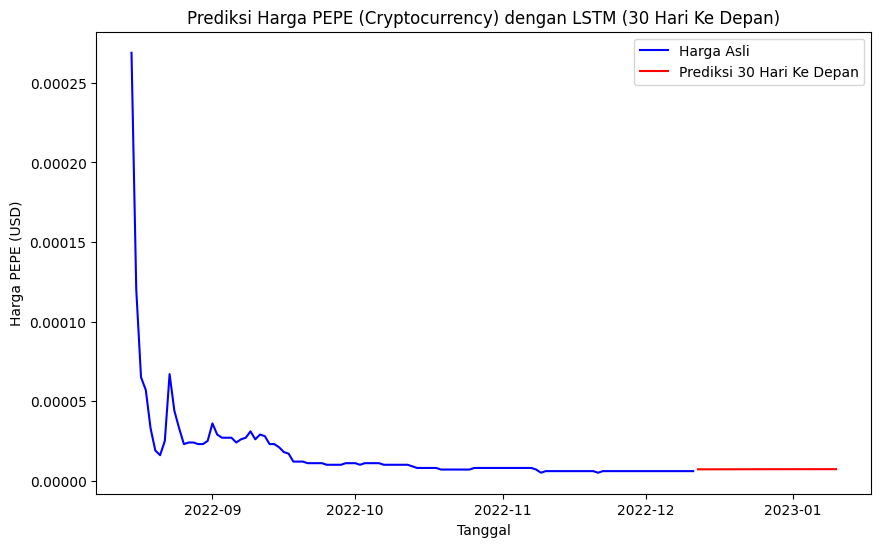

Prediksi Harga PEPE untuk 30 Hari Ke Depan:
2022-12-12: $0.00
2022-12-13: $0.00
2022-12-14: $0.00
2022-12-15: $0.00
2022-12-16: $0.00
2022-12-17: $0.00
2022-12-18: $0.00
2022-12-19: $0.00
2022-12-20: $0.00
2022-12-21: $0.00
2022-12-22: $0.00
2022-12-23: $0.00
2022-12-24: $0.00
2022-12-25: $0.00
2022-12-26: $0.00
2022-12-27: $0.00
2022-12-28: $0.00
2022-12-29: $0.00
2022-12-30: $0.00
2022-12-31: $0.00
2023-01-01: $0.00
2023-01-02: $0.00
2023-01-03: $0.00
2023-01-04: $0.00
2023-01-05: $0.00
2023-01-06: $0.00
2023-01-07: $0.00
2023-01-08: $0.00
2023-01-09: $0.00
2023-01-10: $0.00


In [31]:
def predict_future_days(model, last_60_days, future_days=30):
    future_prices = []
    current_input = last_60_days.reshape(1, -1)
    current_input = current_input.reshape((current_input.shape[0], current_input.shape[1], 1))
    
    for _ in range(future_days):
        predicted_price = model.predict(current_input)
        future_prices.append(predicted_price[0][0])
        
        # Update input untuk prediksi berikutnya
        current_input = np.append(current_input[:, 1:, :], predicted_price.reshape(1, 1, 1), axis=1)

    return future_prices

# Mengambil data terakhir (60 hari terakhir)
last_60_days = data_scaled[-60:]

# Prediksi 30 hari ke depan
predicted_future_prices = predict_future_days(model, last_60_days, future_days=30)

# Mengembalikan prediksi ke skala asli
predicted_future_prices = scaler.inverse_transform(np.array(predicted_future_prices).reshape(-1, 1))

# Menampilkan hasil prediksi
predicted_dates = pd.date_range(start=data.index[-1], periods=31, freq='D')[1:]

plt.figure(figsize=(10,6))
plt.plot(data.index, scaler.inverse_transform(data_scaled), color='blue', label='Harga Asli')
plt.plot(predicted_dates, predicted_future_prices, color='red', label='Prediksi 30 Hari Ke Depan')
plt.title('Prediksi Harga PEPE (Cryptocurrency) dengan LSTM (30 Hari Ke Depan)')
plt.xlabel('Tanggal')
plt.ylabel('Harga PEPE (USD)')
plt.legend()
plt.show()

print("Prediksi Harga PEPE untuk 30 Hari Ke Depan:")
for date, price in zip(predicted_dates, predicted_future_prices):
    print(f"{date.date()}: ${price[0]:.2f}")